In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../data/ceidg_data_classif.csv')

classesdf = pd.read_csv('../data/classes.csv')
divisionsdf = pd.read_csv('../data/divisions.csv')
groupsdf = pd.read_csv('../data/groups.csv')
sections = pd.read_csv('../data/sections.csv')
df


,RandomDate,MonthOfStartingOfTheBusiness,QuarterOfStartingOfTheBusiness,MainAddressVoivodeship,MainAddressCounty,MainAddressTERC,CorrespondenceAddressVoivodeship,CorrespondenceAddressCounty,CorrespondenceAddressTERC,MainAndCorrespondenceAreTheSame,...,ShareholderInOtherCompanies,PKDMainSection,PKDMainDivision,PKDMainGroup,PKDMainClass,NoOfUniquePKDSections,NoOfUniquePKDDivsions,NoOfUniquePKDGroups,NoOfUniquePKDClasses,Target
0,2018-03-26,May,2,MAZOWIECKIE,WARSZAWA,1465011.0,NaN,NaN,NaN,False,...,False,NaN,NaN,NaN,NaN,0,0,0,0,False
1,2018-01-10,June,2,MAZOWIECKIE,WARSZAWA,1465078.0,MAZOWIECKIE,WARSZAWA,1465078.0,True,...,False,M,71.0,711.0,7112.0,4,6,10,13,False
2,2018-03-23,June,2,MAZOWIECKIE,WARSZAWA,1465011.0,MAZOWIECKIE,WARSZAWA,1465011.0,True,...,False,C,14.0,141.0,1412.0,5,6,14,21,False
3,2018-02-13,April,2,MAZOWIECKIE,WARSZAWA,1465011.0,MAZOWIECKIE,WARSZAWA,1465011.0,True,...,False,G,46.0,461.0,4619.0,2,5,8,11,False
4,2018-03-06,December,4,MAZOWIECKIE,WARSZAWA,1465078.0,MAZOWIECKIE,WARSZAWA,1465078.0,True,...,False,C,11.0,110.0,1107.0,3,19,31,44,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2401050,2018-10-14,October,4,ŁÓDZKIE,WIERUSZOWSKI,1018042.0,ŁÓDZKIE,WIERUSZOWSKI,1018042.0,True,...,False,C,25.0,259.0,2599.0,2,3,7,10,False
2401051,2018-10-12,October,4,ŁÓDZKIE,WIERUSZOWSKI,1018032.0,ŁÓDZKIE,WIERUSZOWSKI,1018032.0,True,...,False,C,13.0,139.0,1392.0,2,2,2,2,False
2401052,2018-10-22,October,4,ŁÓDZKIE,WIERUSZOWSKI,1018062.0,ŁÓDZKIE,WIERUSZOWSKI,1018062.0,True,...,False,G,45.0,452.0,4520.0,3,3,3,3,False
2401053,2018-10-22,October,4,ŁÓDZKIE,WIERUSZOWSKI,1018075.0,ŁÓDZKIE,WIERUSZOWSKI,1018075.0,False,...,False,G,47.0,477.0,4776.0,3,3,3,3,True


In [4]:
terminated = df[df.Target==1]
notTerminated = df[df.Target==0]
mean = terminated[['DurationOfExistenceInMonths']].mean()
print("Średnia długość życia firmy przed upadkiem: " + str(mean[0]) + " miesięcy")

print("Upadło " + str(len(terminated.index) / len(df.index) * 100) + "% firm")

Średnia długość życia firmy przed upadkiem: 58.57454102379375 miesięcy
Upadło 17.227343813448673% firm


In [18]:
df["MainAddressVoivodeship"].value_counts()

MAZOWIECKIE              44788
WIELKOPOLSKIE            27098
ŚLĄSKIE                  20914
POMORSKIE                20669
MAŁOPOLSKIE              18505
                         ...  
GORZÓW WLKP.                 1
ZACHONDIOPOMORSKIE           1
POMORSKI                     1
WARMIńSKO-MAZURSKIEGO        1
KOBYLANKA                    1
Name: MainAddressVoivodeship, Length: 73, dtype: int64

In [6]:
foreignCompanies = df[df.HasPolishCitizenship == False]
foreignTerminatedCompanies = foreignCompanies[foreignCompanies.Target == True]

print("Wśrod firm założonych przez osobę bez polskiego obywatelstwa upadło: " + str(len(foreignTerminatedCompanies.index) / len(foreignCompanies.index) * 100) + "% firm")

polishCompanies = df[df.HasPolishCitizenship == True]
polishTerminatedCompanies = polishCompanies[polishCompanies.Target == True]

print("Wśrod firm założonych przez osobę z polskim obywatelstwem upadło: " + str(len(polishTerminatedCompanies.index) / len(polishCompanies.index) * 100) + "% firm")

shareholders = df[df.ShareholderInOtherCompanies == True]
terminatedShareholders = shareholders[shareholders.Target == True]

print("Wśrod firm założonych przez osoby które posiadają udziały w innych firmach upadło: " + str(len(terminatedShareholders.index) / len(shareholders.index) * 100) + "% firm")


Wśrod firm założonych przez osobę bez polskiego obywatelstwa upadło: 9.985827375872086% firm
Wśrod firm założonych przez osobę z polskim obywatelstwem upadło: 17.634154795754625% firm
Wśrod firm założonych przez osoby które posiadają udziały w innych firmach upadło: 4.092264100823471% firm


[100091  76204  39033  35278  31769  20625  18276  17343  16275  12572
  12035  11599   6374   6102   4745   1124    270     18]
HANDEL HURTOWY I DETALICZNY; NAPRAWA POJAZDÓW SAMOCHODOWYCH, WŁĄCZAJĄC MOTOCYKLE             100091
BUDOWNICTWO                                                                                   76204
DZIAŁALNOŚĆ PROFESJONALNA, NAUKOWA I TECHNICZNA                                               39033
PRZETWÓRSTWO PRZEMYSŁOWE                                                                      35278
TRANSPORT I GOSPODARKA MAGAZYNOWA                                                             31769
DZIAŁALNOŚĆ W ZAKRESIE USŁUG ADMINISTROWANIA I DZIAŁALNOŚĆ WSPIERAJĄCA                        20625
POZOSTAŁA DZIAŁALNOŚĆ USŁUGOWA                                                                18276
DZIAŁALNOŚĆ ZWIĄZANA Z ZAKWATEROWANIEM I USŁUGAMI GASTRONOMICZNYMI                            17343
OPIEKA ZDROWOTNA I POMOC SPOŁECZNA                                     

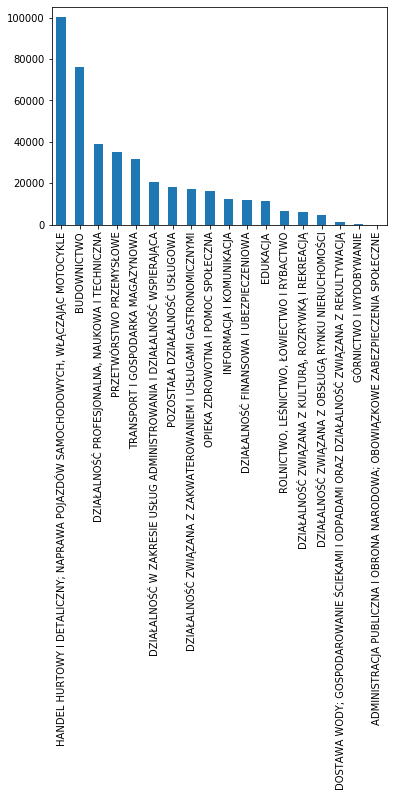

In [13]:
mostTerminatedSections = terminated.set_index('PKDMainSection').join(sections.set_index('pkdCode'))['section'].value_counts()
print(mostTerminatedSections.values)
print(mostTerminatedSections)
mostTerminatedSections.plot.bar()

HANDEL HURTOWY I DETALICZNY; NAPRAWA POJAZDÓW SAMOCHODOWYCH, WŁĄCZAJĄC MOTOCYKLE             417366
BUDOWNICTWO                                                                                  297159
DZIAŁALNOŚĆ PROFESJONALNA, NAUKOWA I TECHNICZNA                                              249187
OPIEKA ZDROWOTNA I POMOC SPOŁECZNA                                                           176190
PRZETWÓRSTWO PRZEMYSŁOWE                                                                     167848
TRANSPORT I GOSPODARKA MAGAZYNOWA                                                            138250
POZOSTAŁA DZIAŁALNOŚĆ USŁUGOWA                                                                96851
INFORMACJA I KOMUNIKACJA                                                                      88548
DZIAŁALNOŚĆ W ZAKRESIE USŁUG ADMINISTROWANIA I DZIAŁALNOŚĆ WSPIERAJĄCA                        69303
DZIAŁALNOŚĆ ZWIĄZANA Z ZAKWATEROWANIEM I USŁUGAMI GASTRONOMICZNYMI                            58916


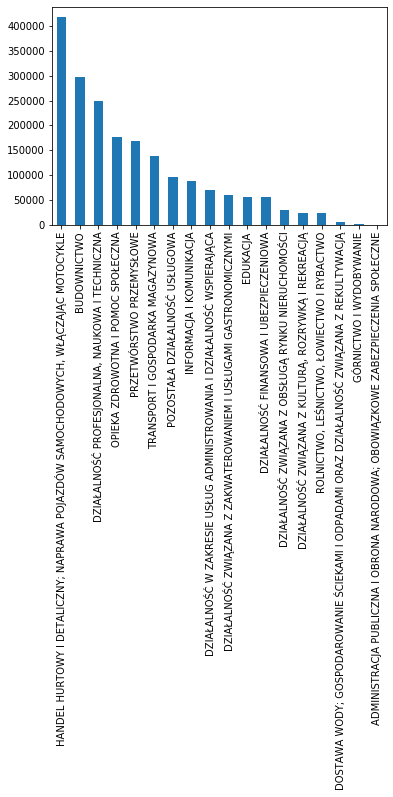

In [14]:
leastTerminatedSections = notTerminated.set_index('PKDMainSection').join(sections.set_index('pkdCode'))['section'].value_counts()

print(leastTerminatedSections)
leastTerminatedSections.plot.bar()

5     22.935015
8     22.742234
16    22.090525
6     20.595383
1     20.410164
11    19.342863
2     19.034716
17    18.685559
3     17.856348
15    17.367545
9     17.263756
14    15.874643
10    15.661253
0     14.876033
7     13.562956
4     13.542780
12    12.432753
13     8.456083
Name: section, dtype: float64


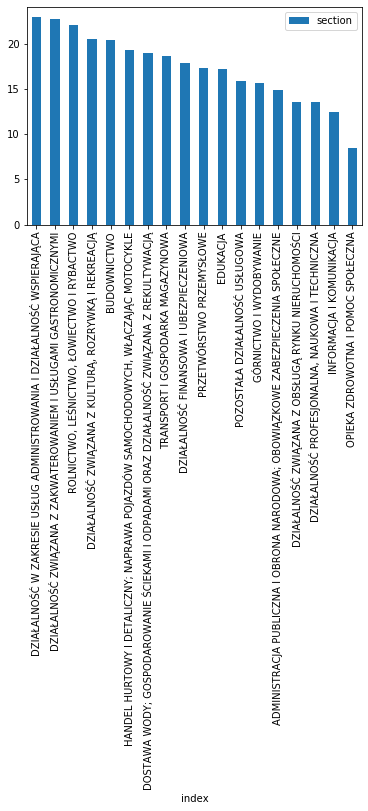

In [23]:
allcount  = df.set_index('PKDMainSection').join(sections.set_index('pkdCode'))['section'].value_counts().rename_axis('pkdCode')


terminatedRatio = terminated.set_index('PKDMainSection').join(sections.set_index('pkdCode'))['section'].value_counts().divide(allcount).multiply(100)
terminatedRatio = (terminatedRatio.to_frame().reset_index()).sort_values('section', ascending=False)
print(terminatedRatio.section)
terminatedRatio.plot.bar(x='index', y='section')

In [ ]:
terminat

In [10]:
terminated["TerminationYear"] = terminated["DateOfTermination"].str.extract(r'(^\w{4})')
terminationYears = terminated["TerminationYear"].value_counts().sort_index(ascending=True)
terminationYears.plot.line()

KeyError: 'DateOfTermination'

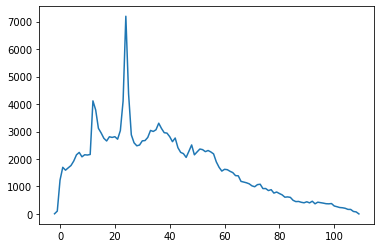

In [24]:
terminationMonths = terminated["DurationOfExistenceInMonths"].value_counts().sort_index(ascending=True)
terminationMonths.plot.line()

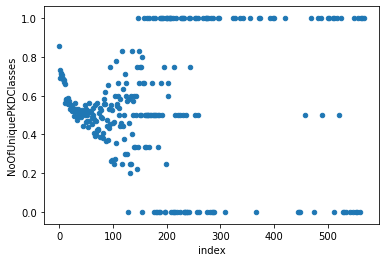

In [25]:
terminatedPkdClasses = terminated["NoOfUniquePKDClasses"].value_counts().sort_index()
allPkdClasses = df["NoOfUniquePKDClasses"].value_counts().sort_index()

terminatedPkdClasses.divide(allPkdClasses).fillna(0).to_frame().reset_index().plot.scatter(x='index', y='NoOfUniquePKDClasses')

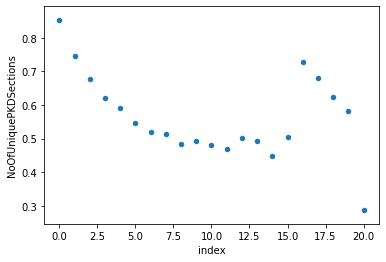

In [26]:
terminatedPkdSections = terminated["NoOfUniquePKDSections"].value_counts().sort_index()
allPkdSections = df["NoOfUniquePKDSections"].value_counts().sort_index()

terminatedPkdSections.divide(allPkdSections).fillna(0).to_frame().reset_index().plot.scatter(x='index', y='NoOfUniquePKDSections')